# Data Analytics with Python Course - Final Assessment
## Data Collection and Cleaning
submitted by: Ramon (Monch) Mercader

submitted to: Ramon Perez / Coder Academy - ramon.perez@coderacademy.edu.au

Notebook 1 of 2

Please use README.md file for project background and context for this file.

### Dataset

About the Dataset

How was it collected?

Reference links

Credit to person who created the scraping script

How the data is organized
Possible issues with the datasets
     - How to clean the data later



In [1]:
#Imported libraries
import os
import glob
import requests
import numpy as np
import pandas as pd
import json
import datetime
from collections import Counter
print("all items imported")

all items imported


In [2]:
#Housekeeping, check your current working directory and make sure you are inside Final_Assessment (or the main directory with datasets folder)
#You will need to use the output of this cell as your path in the next cell
os.getcwd()

'/Users/monchmercader/Python/Data_Analytics/Module 1/Final_Assessment'

In [21]:
#Collect all AU data and concatenate into AU dataframe
#Use the path above and add /datasets
#This uses an absolute path and os.path.join to make it OS independent
#My Mac path:
path = r'//Users/monchmercader/Python/Data_Analytics/Module 1/Final_Assessment/datasets'
#My Windows path:
#path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'
all_AU_files = glob.glob(os.path.join(path, "????????_AU_videos.csv"))     

df_from_each_AU_file = (pd.read_csv(f) for f in all_AU_files)
Total_AU_df   = pd.concat(df_from_each_AU_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [22]:
Total_AU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        600 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [23]:
Total_AU_df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,aCIMYjqWxwA,"Australian Lamb: Make Lamb, Not Walls",2021-01-10T18:59:21Z,UC72mdTdZGMpLNG5kRfFVvaw,Australian Lamb,26,21.11.01,[none],132281,2339,114,0,https://i.ytimg.com/vi/aCIMYjqWxwA/default.jpg,True,False,Australia 2031. Our once united nation has bee...
1,snrPqH84tuc,I WAS ALL ALONE ON MY BIRTHDAY! (THEY FORGOT),2021-01-09T22:36:42Z,UC56D-IHcUvLVFTX_8NpQMXg,Brent Rivera,24,21.11.01,[none],3323919,226939,2788,41783,https://i.ytimg.com/vi/snrPqH84tuc/default.jpg,False,False,LIKE THIS VIDEO TO WISH ME A HAPPY BIRTHDAY :)...
2,sJn8dG9iSaw,Among Us Logic 13 | Cartoon Animation,2021-01-10T00:00:08Z,UCToxKVrkEuAONR4rFIJ_DyQ,GameToons,1,21.11.01,among us|among us logic|animation|funny animat...,2494114,94922,2277,12744,https://i.ytimg.com/vi/sJn8dG9iSaw/default.jpg,False,False,They are AMONG US skin pack ➡️ https://cutt.ly...


In [ ]:
#Collect all PH data and concatenate into PH dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_PH_files = glob.glob(os.path.join(path, "????????_PH_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_PH_file = (pd.read_csv(f) for f in all_PH_files)
Total_PH_df   = pd.concat(df_from_each_PH_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
Total_PH_df.info()

In [ ]:
Total_PH_df.head(3)

In [ ]:
#Collect all NZ data and concatenate into NZ dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_NZ_files = glob.glob(os.path.join(path, "????????_NZ_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_NZ_file = (pd.read_csv(f) for f in all_NZ_files)
Total_NZ_df   = pd.concat(df_from_each_NZ_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
Total_NZ_df.info()

In [ ]:
Total_NZ_df.head(3)

In [ ]:
#Collect all US data and concatenate into US dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_US_files = glob.glob(os.path.join(path, "????????_US_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_US_file = (pd.read_csv(f) for f in all_US_files)
Total_US_df = pd.concat(df_from_each_US_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
Total_US_df.info()

In [ ]:
Total_US_df.head(3)

In [ ]:
#Collect all SG data and concatenate into SG dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_SG_files = glob.glob(os.path.join(path, "????????_SG_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_SG_file = (pd.read_csv(f) for f in all_SG_files)
Total_SG_df = pd.concat(df_from_each_SG_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
Total_SG_df.info()

In [ ]:
Total_SG_df.tail(4)

In [ ]:
#Collect all GB data and concatenate into GB dataframe
path = r'C:\Users\monch.mercader\Python\Data_Analytics\Module 1\Final_Assessment\datasets'                     # use your path
all_GB_files = glob.glob(os.path.join(path, "????????_GB_videos.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_GB_file = (pd.read_csv(f) for f in all_GB_files)
Total_GB_df = pd.concat(df_from_each_GB_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [ ]:
Total_GB_df.info()

In [ ]:
Total_GB_df.head(3)

In [24]:
Total_AU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           600 non-null    object
 1   title              600 non-null    object
 2   publishedAt        600 non-null    object
 3   channelId          600 non-null    object
 4   channelTitle       600 non-null    object
 5   categoryId         600 non-null    int64 
 6   trending_date      600 non-null    object
 7   tags               600 non-null    object
 8   view_count         600 non-null    int64 
 9   likes              600 non-null    int64 
 10  dislikes           600 non-null    int64 
 11  comment_count      600 non-null    int64 
 12  thumbnail_link     600 non-null    object
 13  comments_disabled  600 non-null    bool  
 14  ratings_disabled   600 non-null    bool  
 15  description        600 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

In [25]:
Total_AU_df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [26]:
#Filter categories to the most relevant, categoryId: 19 - Travel & Events, 21 - Video blogging, 22 - People & Blogs, 26 - How To & Style, 37 Family)

Total_AU_df_filtered = Total_AU_df.drop(Total_AU_df[(Total_AU_df['categoryId'] != 19) & (Total_AU_df['categoryId'] != 21) 
                                                    & (Total_AU_df['categoryId'] != 22) & (Total_AU_df['categoryId'] != 26) 
                                                    & (Total_AU_df['categoryId'] != 37)].index) 

In [27]:
Total_AU_df_filtered.tail(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
515,Yx-FgJ-PqaA,Revealing the secret I've kept for 3 years...I...,2021-01-11T00:00:11Z,UCAHufvd02viJSRdt3ojdPOg,Sarahs Day,22,21.13.01,sunee|Sarahs day|healthy cooking|healthy recip...,245822,15897,355,1901,https://i.ytimg.com/vi/Yx-FgJ-PqaA/default.jpg,False,False,Sunee App https://www.sunee.com☼Healthy Cookin...
540,qzFXj3YW01A,My Among Us Birthday 🙄,2021-01-01T18:39:24Z,UCECfNdmd7m2FnmfvWeFoGpg,BriannaShorts,22,21.13.01,brianna|briannashorts|brianna shorts|briannapl...,2162340,60411,2448,1919,https://i.ytimg.com/vi/qzFXj3YW01A/default.jpg,False,False,My Among Us Birthday ... Brianna and her Impos...
542,rJ-FEfXzKIY,STEPHEN TRIES vs CALFREEZY | Park The Bus Epis...,2021-01-07T16:00:01Z,UCIgl4k5noP5bHyqFqSccy_Q,UMM,22,21.13.01,umm|umm football|umm channel|harry pinero|harr...,266497,11963,110,275,https://i.ytimg.com/vi/rJ-FEfXzKIY/default.jpg,False,False,Subscribe to UMM ► https://bit.ly/UMMofficial1...
543,aTLPHmrr-cM,Something we want to tell you!,2021-01-04T18:43:10Z,UCHUE4ypXKp7ZkmdWbGJNgJg,AmazingPhil,22,21.13.01,dan and phil|dan and phil 2021|life update|lif...,2208444,208111,1354,16243,https://i.ytimg.com/vi/aTLPHmrr-cM/default.jpg,False,False,Where has Dan been?! What are our future plans...
557,aE_zvyuAcuo,If Everything Was Like Among Us *Bloopers 2*,2021-01-01T22:15:10Z,UCn3AViOfcFN4zIICMC5hvPg,Shiloh & Bros,22,21.13.01,among us|among us in real life|among us impost...,4752594,76643,2344,8165,https://i.ytimg.com/vi/aE_zvyuAcuo/default.jpg,False,False,Among us in real life bloopers! These are bloo...
559,hKUOkiKHD8U,Elon Musk Most Shocking 2021 Predictions - And...,2020-12-29T21:25:52Z,UC_0fFiRC70exikffwgm2Uog,Roger James Hamilton,26,21.13.01,roger j hamilton|roger hamilton|entrepreneur t...,1250564,24128,922,4390,https://i.ytimg.com/vi/hKUOkiKHD8U/default.jpg,False,False,"If you thought 2020 was disruptive, wait until..."
573,SAjP9HCqk4I,Deadpool 2 Monologue,2021-01-04T22:15:37Z,UCA3-nIYWu4PTWkb6NwhEpzg,Ryan Reynolds,22,21.13.01,[none],1540252,95454,770,3100,https://i.ytimg.com/vi/SAjP9HCqk4I/default.jpg,False,False,Introducing Walker Scobell. This innocent youn...
583,JMgHZ5XHA_4,"He Bet $20,000 On A Coinflip, And Won",2021-01-07T21:11:13Z,UC4-79UOlP48-QNGgCko5p2g,MrBeast Shorts,22,21.13.01,[none],2721926,136630,1485,6883,https://i.ytimg.com/vi/JMgHZ5XHA_4/default.jpg,False,False,Subscribe if you want to do this #shorts this ...
592,bIiLofAhTz8,ALLERGIC REACTION after SAYING YES to the dress,2021-01-05T01:13:39Z,UCLGe0PxyRFWmXVGJKq_gGvw,fancy vlogs by gab,22,21.13.01,Allergic reaction after saying yes to the dres...,724938,29874,1661,2517,https://i.ytimg.com/vi/bIiLofAhTz8/default.jpg,False,False,What is grace? https://youtu.be/m2bz8mnWsbsBea...
595,ZSIp00SewO8,Day 1 - Invite | BREATH - A 30 Day Yoga Journey,2021-01-02T06:00:03Z,UCFKE7WVJfvaHW5q283SxchA,Yoga With Adriene,26,21.13.01,breath|30 day yoga journey|30 days of yoga|yog...,2408951,65880,911,9176,https://i.ytimg.com/vi/ZSIp00SewO8/default.jpg,False,False,The YWA POP UP Shop is Live! Find custom made ...


In [28]:
Total_AU_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 595
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           80 non-null     object
 1   title              80 non-null     object
 2   publishedAt        80 non-null     object
 3   channelId          80 non-null     object
 4   channelTitle       80 non-null     object
 5   categoryId         80 non-null     int64 
 6   trending_date      80 non-null     object
 7   tags               80 non-null     object
 8   view_count         80 non-null     int64 
 9   likes              80 non-null     int64 
 10  dislikes           80 non-null     int64 
 11  comment_count      80 non-null     int64 
 12  thumbnail_link     80 non-null     object
 13  comments_disabled  80 non-null     bool  
 14  ratings_disabled   80 non-null     bool  
 15  description        80 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usage:

In [29]:
#Since the raw CSV scrapes are collected daily, videos may be popular over a period of time. Therefore, it is necessary to filter out the duplicates, and retain the most recent occurance of the video_id.
#This can be done by first finding out how many duplicates a video_id has. 
#The lines below uses the video_id column to pivot and counts the number of instances it appears in the dataframe

dup_df = pd.DataFrame(Total_AU_df_filtered, columns= ['video_id'])

duplicates_df = dup_df.pivot_table(index=['video_id'], aggfunc='size')
print (duplicates_df)

video_id
2Al7H9AiN1A    1
48NAQCSnHdQ    1
4_Vp3FhrzTk    1
4eSkcCuliJE    3
7WteIGHPStg    3
9iEBLoX2BxI    2
AYCgAZc5mck    3
B6bJ_vTslyo    3
Dan4aEicr-g    2
FnYI8chEJ_w    1
HZ-bqnA5ioQ    3
JMgHZ5XHA_4    3
RIjSZxqlPpA    2
S6aXAwYT6nY    1
SAjP9HCqk4I    3
Yx-FgJ-PqaA    2
ZSIp00SewO8    3
_xJUCsyMQes    3
aCIMYjqWxwA    3
aE_zvyuAcuo    3
aTLPHmrr-cM    3
bIiLofAhTz8    3
e4wajXk_cDs    3
f8oy13PjR-Y    3
hKUOkiKHD8U    3
lS4Tit7taes    2
m4rAQlCfJsw    2
oKVgdxUPHWQ    2
p19cjKg8dIc    1
qgaTjrH5_yo    2
qzFXj3YW01A    3
rJ-FEfXzKIY    3
z4FnDEYg2yw    2
zBZ4skqOm04    2
dtype: int64


In [30]:
#This is to check that the drop_duplicates action in the next cells keep the correct entry (highest video)
Total_AU_df_filtered.loc[Total_AU_df_filtered['video_id'] == '4eSkcCuliJE']


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
77,4eSkcCuliJE,When you suck at gaming,2021-01-05T04:50:40Z,UCJf7YEdkEV33UXnm0gLzwvA,Jimi Jackson,22,21.11.01,[none],290786,17950,143,1233,https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg,False,False,Thanks to Konic for sponsoring this video! Che...
311,4eSkcCuliJE,When you suck at gaming,2021-01-05T04:50:40Z,UCJf7YEdkEV33UXnm0gLzwvA,Jimi Jackson,22,21.14.01,[none],335269,19126,157,1269,https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg,False,False,Thanks to Konic for sponsoring this video! Che...
514,4eSkcCuliJE,When you suck at gaming,2021-01-05T04:50:40Z,UCJf7YEdkEV33UXnm0gLzwvA,Jimi Jackson,22,21.13.01,[none],328212,18938,157,1265,https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg,False,False,Thanks to Konic for sponsoring this video! Che...


In [31]:
#This uses the drop method to remove the duplicates under the video_id column, and to keep the last instance. 
new_df = Total_AU_df_filtered.drop_duplicates(subset=['video_id'], keep='last')

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 162 to 595
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           34 non-null     object
 1   title              34 non-null     object
 2   publishedAt        34 non-null     object
 3   channelId          34 non-null     object
 4   channelTitle       34 non-null     object
 5   categoryId         34 non-null     int64 
 6   trending_date      34 non-null     object
 7   tags               34 non-null     object
 8   view_count         34 non-null     int64 
 9   likes              34 non-null     int64 
 10  dislikes           34 non-null     int64 
 11  comment_count      34 non-null     int64 
 12  thumbnail_link     34 non-null     object
 13  comments_disabled  34 non-null     bool  
 14  ratings_disabled   34 non-null     bool  
 15  description        34 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usag

In [33]:
new_df.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
162,S6aXAwYT6nY,MY LAST PREGNANCY UPDATE ON THE TWINS | OUR UL...,2021-01-04T20:53:06Z,UC_0mlge_fLewbr5P8YEL2tA,THE WEISS LIFE,26,21.11.01,pregnancy update on the twins!|unexpected news...,199889,9208,309,0,https://i.ytimg.com/vi/S6aXAwYT6nY/default.jpg,True,False,Don't forget to subscribe! http://www.youtube....
171,4_Vp3FhrzTk,EATING MASSIVE SEA URCHIN,2020-12-17T03:44:22Z,UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,22,21.11.01,[none],3422355,80402,5955,3326,https://i.ytimg.com/vi/4_Vp3FhrzTk/default.jpg,False,False,Uni is certainly not for everybody. It's a bla...
172,2Al7H9AiN1A,Positive 2021 Goals! 12 Unique Ab Exercises & ...,2020-12-31T04:41:05Z,UCAHufvd02viJSRdt3ojdPOg,Sarahs Day,22,21.11.01,new years resolution|goals|setting goals|new y...,455438,26518,190,1028,https://i.ytimg.com/vi/2Al7H9AiN1A/default.jpg,False,False,SWEAT IT TO SHRED IT EBOOK FITNESS GUIDES!!htt...


In [34]:
#Confirmed that the process was correct, we see the latest entry

new_df.loc[new_df['video_id'] == '4eSkcCuliJE']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
514,4eSkcCuliJE,When you suck at gaming,2021-01-05T04:50:40Z,UCJf7YEdkEV33UXnm0gLzwvA,Jimi Jackson,22,21.13.01,[none],328212,18938,157,1265,https://i.ytimg.com/vi/4eSkcCuliJE/default.jpg,False,False,Thanks to Konic for sponsoring this video! Che...


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 162 to 595
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           34 non-null     object
 1   title              34 non-null     object
 2   publishedAt        34 non-null     object
 3   channelId          34 non-null     object
 4   channelTitle       34 non-null     object
 5   categoryId         34 non-null     int64 
 6   trending_date      34 non-null     object
 7   tags               34 non-null     object
 8   view_count         34 non-null     int64 
 9   likes              34 non-null     int64 
 10  dislikes           34 non-null     int64 
 11  comment_count      34 non-null     int64 
 12  thumbnail_link     34 non-null     object
 13  comments_disabled  34 non-null     bool  
 14  ratings_disabled   34 non-null     bool  
 15  description        34 non-null     object
dtypes: bool(2), int64(5), object(9)
memory usag

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = [6.0, 6.0] # control the width and height of all figures
plt.rcParams['figure.dpi'] = 500 # control the quality of all figures. Higher is better :)

%matplotlib inline

Text(0, 0.5, 'Total likes')

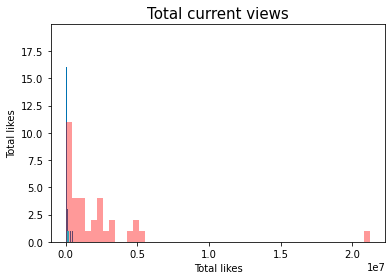

In [37]:
plt.hist(x=new_df['likes']);

plt.hist(x=new_df['view_count'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=new_df['likes'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.hist(x=new_df['dislikes'], color='pink', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Total current views', fontdict={'fontsize': 15})
plt.xlabel('Total likes')
plt.ylabel('Total likes')
# plt.show()

In [38]:
plt.hist(x=df['maxtemp'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=df['mintemp'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Maximum & Minimum Temperature - 2007-2017', fontdict={'fontsize': 15})
plt.xlabel('Temperature Distribution in Celcius')
plt.ylabel('Temperature Frequency in 10 Years')
# plt.show()

NameError: name 'df' is not defined